# Classification in Practice

In this laboratory session we will gain some experience working with linear models for **classification** (we already saw how to do regression in a previous lab).

We will follow the same general structure... with one exception -- for this laboratory we will begin with **synthetic** datasets. 

## Part 1: Working with Synthetic Classification Problems

Generating synthetic datasets allows us to gain insight into how classifiers work. We will use some functionality of Scikit-learn to generate -- in a controlled manner -- synthetic classification problems of with various characteristics.

**Note**: When working with these synthetic datasets we will *not* go to the trouble of generating train/test splits -- we are only interested in studying how classifiers work to **separate** the training data.

### Exercise 1.1: Generating a dataset

First, have a look at the documentation for [sklearn.datasets.make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs). This is one of the easiest ways to generate /simple/ classification problems. Study the documentation and then use `make_blobs` to generate an **EASY** dataset for a **two-class** classification problem with 100 samples per class and 2 input features. What does **EASY** mean? How can we determine, qualitatively, that the randomly generated dataset is "easy"? Make the problem *easy*, but not *too easy*.

**Hint**: You will probably want to develop a *visualization* for datasets, and then *abstract* it into a function you can call later for other datasets. 

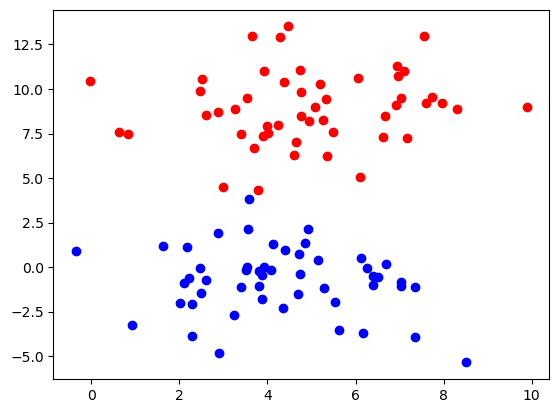

In [20]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.covariance._empirical_covariance")
warnings.filterwarnings("ignore", category=UserWarning, message="Variables are collinear", module="sklearn.discriminant_analysis")
warnings.filterwarnings("ignore", category=UserWarning, message="Variables are collinear", module="sklearn.metrics")


def visualizer(X, y):
    plt.figure()
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue')
    plt.show()

x, y = make_blobs(n_samples=100, centers= 2, cluster_std=2)
visualizer(x, y)


The image generated by your code shows two distinct clusters, one in red and the other in blue. These clusters represent samples generated using make_blobs with centers=2, which creates two groups of data points.

Since you used cluster_std=2, each cluster has a moderate spread, which is reflected in the fact that the points are loosely but distinctly grouped in each color.

I use this link to study and create blobs: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs


### Exercise 1.2: "Solving" the dataset

Train a classifier that is *perfectly* classifies the dataset you created above. Any of the the three classifiers mentioned in the *Capsule Lecture* should do well. Try one, or try all three. Be sure to verify that the classifier does *indeed* classify all training points correctly.

**Hint**: You might want to look at [sklearn.metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) for this.

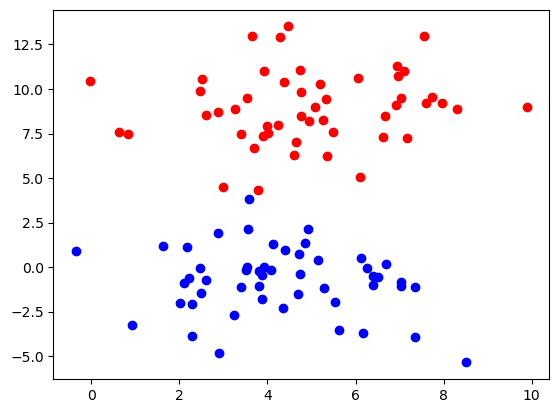

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC #support vector classifier
from  sklearn.metrics import classification_report

#Your code here

def visualizeClassifier(lda, x, y):
    lda.fit(x, y)  # Fit the LinearDiscriminantAnalysis model to the data
    correct = (lda.predict(x) == y)  # Check if predictions match ground truth
    visualizer(x, y)
    accuracy = sum(correct) / len(correct)  # Calculate accuracy
    print(f"Accuracy: {accuracy:.2f}")

    # Print a classification report for precision, recall, and F1-score
    print(classification_report(y, lda.predict(x)))
    
# Create a LinearDiscriminantAnalysis classifier
lda = LinearDiscriminantAnalysis()

# Call the visualization function to analyze and display the classifier
visualizeClassifier(lda, x, y)

linearmente separabili l'accuracy è 1

/opt/miniconda3/envs/FML/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


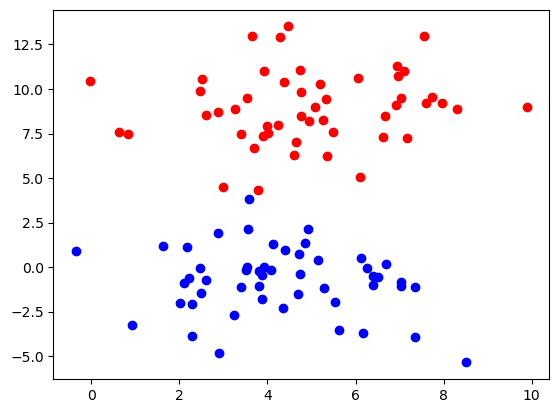

Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.98      0.99        50

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [22]:
# Create a Linear Support Vector Classifier (SVC) with 'dual' set to True to address a warning
svc = LinearSVC(dual=True)

visualizeClassifier(svc, x, y)

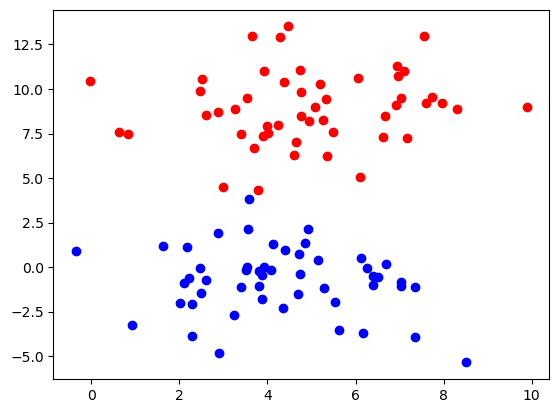

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [23]:
# Create a Quadratic Discriminant Analysis (QDA) classifier
qda = QuadraticDiscriminantAnalysis()

# Call the visualization function to analyze and display the classifier
visualizeClassifier(qda, x, y)

hasdkjfhbkweashnncjwqoeòlcm

### Exercise 1.3: Visualizing the decision surfaces

One of the best ways to understand how a classifier works is to visualize the decision boundaries. Use [sklearn.inspection.DecisionBoundaryDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html) to create a visualization of the *dataset* and the *decision boundaries* for your classifier.

**Note**: This is another great opportunity to apply *functional abstraction* and make a **reusable** visualization that you can reuse (for example in the next exercise).

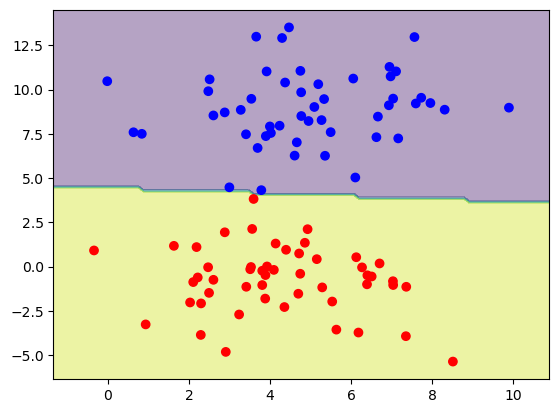

In [24]:
# Import the necessary function for decision boundary visualization
from sklearn.inspection import DecisionBoundaryDisplay

# Define a function to visualize the decision boundary of a classifier
def visualizeDecisionBoundary(classifier, X, y, cmap="bwr", alpha=0.4, response_method="predict"):
    # Fit the classifier on the input data and labels
    classifier.fit(X, y)

    # Create a decision boundary display using the provided classifier, data, response method, and alpha transparency
    disp = DecisionBoundaryDisplay.from_estimator(
        classifier, X, response_method=response_method, alpha=alpha
    )

    # Scatter plot of the input data points with colors based on class labels
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

# Create an instance of Linear Discriminant Analysis (LDA)
ldc = LinearDiscriminantAnalysis()

# Visualize the decision boundary of the LDA classifier on the provided dataset
visualizeDecisionBoundary(ldc, x, y)


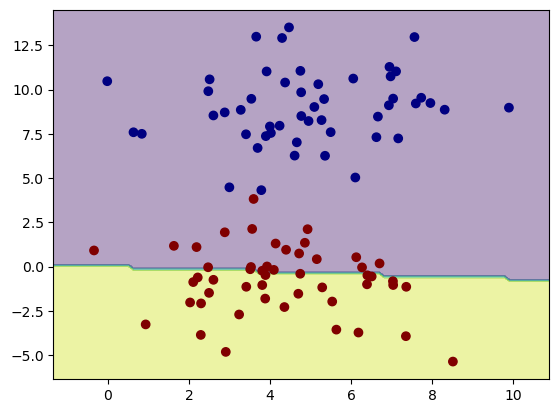

In [25]:
# Create an instance of Linear Support Vector Classifier (SVC) with specific parameters
svc = LinearSVC(C=0.00000001, dual=True)

# Visualize the decision boundary of the Linear SVC classifier on the dataset
visualizeDecisionBoundary(svc, x, y, cmap="jet")

il primo è più preciso, perchè?


### Exercise 1.4: A harder dataset

Repeat the exercises above, but first generate a **hard** dataset that is not linearly separable. Observe how linear classifiers fail to correctly classify the training data. How can we make these classifiers capable of "solving" this harder dataset? Try to find an explicit embedding that makes the problem linearly separable in the embedding space. Visualize the decision boundaries in the **original** space (you will need to spend some time with the documentation for `DecisionBoundaryDisplay` to make this work).

<Figure size 1200x500 with 0 Axes>

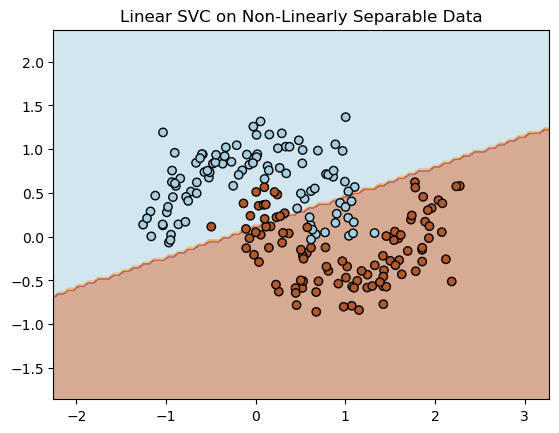

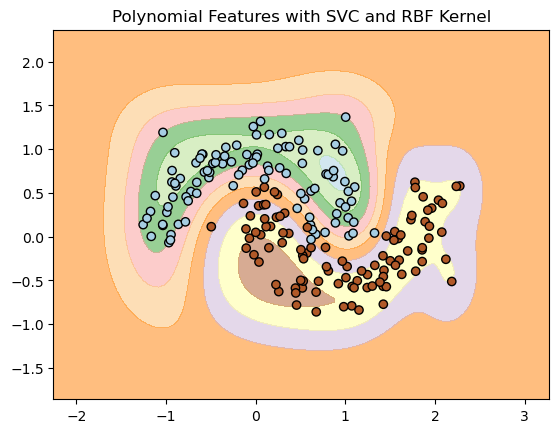

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.inspection import DecisionBoundaryDisplay

# Generate a non-linear dataset using 'make_moons' with 200 samples and some noise
X, y = make_moons(n_samples=200, noise=0.2)

# Initialize and train a Support Vector Classifier with a linear kernel
linear_svc = SVC(kernel='linear').fit(X, y)

# Create a pipeline that adds polynomial features (degree 2) and applies SVC with an RBF kernel
poly_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2)),  # Step to add polynomial features
    ("svm_clf", SVC(kernel='rbf', gamma=0.5))         # SVM with RBF kernel and gamma parameter for non-linearity
])
# Train the polynomial SVM classifier on the data
poly_clf.fit(X, y)

# Set up the figure with a specified size for plotting
plt.figure(figsize=(12, 5))

# Plot the decision boundary of the linear SVC on the dataset
DecisionBoundaryDisplay.from_estimator(linear_svc, X, response_method="predict", cmap=plt.cm.Paired, alpha=0.5)
# Scatter plot of the data points, colored by class labels
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.Paired)
plt.title("Linear SVC on Non-Linearly Separable Data")

# Plot the decision boundary of the polynomial SVM classifier with RBF kernel
DecisionBoundaryDisplay.from_estimator(poly_clf, X, response_method="decision_function", cmap=plt.cm.Paired, alpha=0.5)
# Scatter plot of the same data points for the second plot
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.Paired)
plt.title("Polynomial Features with SVC and RBF Kernel")

plt.show()

citare chatGPT

---
## Part 2: A Real Dataset

In the second set of exercises we will work with a classic dataset for classification: the Iris Flower Classification Dataset. It is a fairly easy dataset to work with since it is low-dimensional and small. We start by loading the dataset, and then proceed with our usual protocol: "playing" with the data, creating train/test splits, and building and evaluating a first classifier. 

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

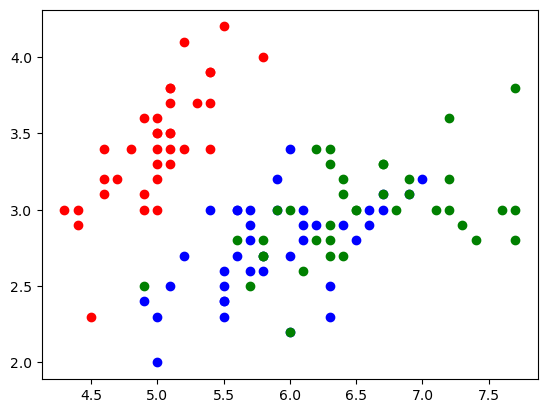

In [27]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the iris classification dataset to get started.
ds = load_iris()

# Extract the features (Xs), targets (ys), and class names (labels).
Xs = ds.data
ys = ds.target
classes = ds.target_names

# Make a Pandas DataFrame too, just for shits and giggles.
df = pd.DataFrame(Xs, columns=ds.feature_names)
targets = pd.Series(ds.target)

# Print the class labels (targets) to check the dataset's structure.
print(ds['DESCR'])

column_names = ds['feature_names']
print(column_names)
# Split the dataset into training and testing sets using train_test_split, where Xtr and ytr are training data.
Xtr, Xts, ytr, yts = train_test_split(Xs, ys, random_state=42)

def new_visualizer(X, y):
    plt.figure()
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue')
    plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], color='green')
    plt.show()

new_visualizer(Xtr, ytr)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
    :Class Distribution: 33.3% for each of 3 classes.
    :Creator: R.A. Fisher
    :Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
    :Date: July, 1988

The famous Iris database, first used by Sir R.A. Fisher. The dataset is taken
from Fisher's paper. Note that it's the same as in R, but not as in the UCI
Machine Learning Repository, which has two wrong data points.

This is perhaps the best known database to be found in the
pattern recognition literature.  Fisher's paper is a classic in the field and
is referenced frequently to this day.  (See Duda & Hart, for example.)  The
data set contains 3 classes of 50 instances each, where each class refers to a
type of iris plant.  One class is linearly separable from the other 2; the
latter are NOT linearly separable from each other.

.. topic:: References

   - Fisher, R.A. "The use of multiple measurements in taxonomic problems"
     Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to
     Mathematical Statistics" (John Wiley, NY, 1950).
   - Duda, R.O., & Hart, P.E. (1973) Pattern Classification and Scene Analysis.
     (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   - Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
     Structure and Classification Rule for Recognition in Partially Exposed
     Environments".  IEEE Transactions on Pattern Analysis and Machine
     Intelligence, Vol. PAMI-2, No. 1, 67-71.
   - Gates, G.W. (1972) "The Reduced Nearest Neighbor Rule".  IEEE Transactions
     on Information Theory, May 1972, 431-433.
   - See also: 1988 MLC Proceedings, 54-64.  Cheeseman et al"s AUTOCLASS II
     conceptual clustering system finds 3 classes in the data.
   - Many, many more ...
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### Exercise 2.1: Play with the data

Use everything we have learned about *exploratory data analysis* to study the nature and characteristics of this classification problem. Are the classes equally represented? How many features are there in input? How are input features scaled? **Be creative** and **summarize** your findings with analysis along the way.

Distribuzione delle classi:
target
0    50
1    50
2    50
Name: count, dtype: int64

Nomi delle colonne (features):
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')


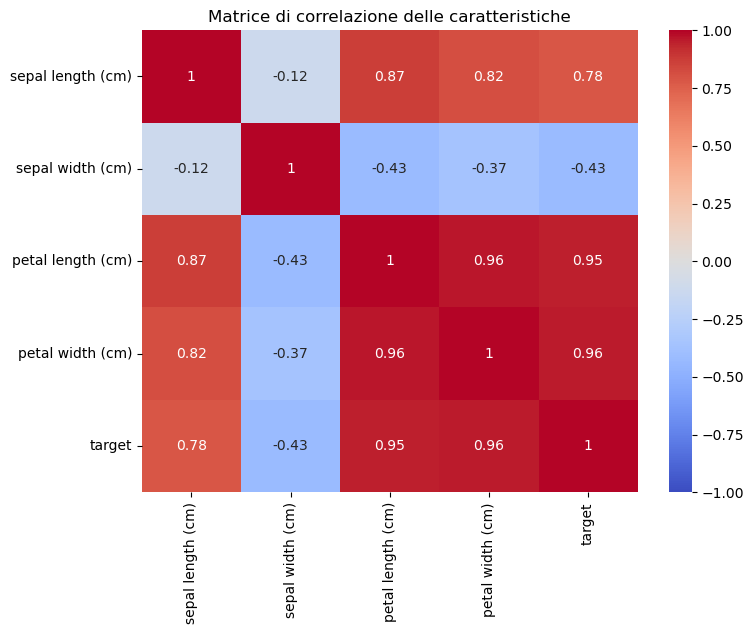

In [28]:
# Your data playground here.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import warnings
from sklearn.exceptions import DataConversionWarning

# Ignorare i warning relativi alla conversione dei dati
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Caricare il dataset Iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# 1. Distribuzione delle classi nel dataset
class_distribution = df['target'].value_counts()
print("Distribuzione delle classi:")
print(class_distribution)

# 2. Nomi delle colonne (caratteristiche)
print("\nNomi delle colonne (features):")
print(df.columns)

# 3. Calcolare la matrice di correlazione tra le caratteristiche
corr_matrix = df.corr()

# 4. Creare una heatmap per visualizzare le correlazioni con annotazioni
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice di correlazione delle caratteristiche')
plt.show()

cygthfy


### Exercise 2.2: Your Turn

Design an experiment to decide which of the three classifiers we have seen performs best on this dataset. Some things to keep in mind:
+ You will probably want to use [sklearn.model_selection.cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to perform K-fold cross-validation to ensure you are *robustly* estimating performance.
+ All three of the classifier models we have used support **regularization**, which might be an interesting hyperparameter to cross-validate. Unfortunately they use slightly different terminologies:
  + in `sklearn.discriminant_analysis.LinearDiscriminantAnalysis` it is called `shrinkage`
  + in `sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis` it is called `reg_param`
  + and in `sklearn.svm.LinearSVC` it is called `C` -- but the regularization performed is 1/C!
  
**Important**: Remember to *document* your findings and analyses along the way. Summarize and justify your final conclusions.

In [29]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

# Function to find the best configuration for Linear Discriminant Analysis (LDA)
def bestLDA(Xs, ys):
    # List of shrinkage values to evaluate
    shrinkage = [None, 'auto', 0.0000001, 0.2, 0.3, 0.4, 0.9]

    # Dictionary to store cross-validation results
    cross_val_results_LDA = {}

    best_shrinkage = None
    best_score = 0.0
    best_degree_LDA = 0
    print("\nBest LDA Configuration:")
    
    # Iterate over different polynomial degrees (1 and 2)
    for i in range(1, 3):
        print(f"Evaluating Degree {i}:")
        
        # Iterate over different shrinkage values
        for shrinkage_value in shrinkage:
            # Use a pipeline with scaling, polynomial expansion, and LDA
            pipeline = make_pipeline(
                StandardScaler(),
                PolynomialFeatures(degree=i),
                LinearDiscriminantAnalysis(solver='lsqr', shrinkage=shrinkage_value, tol=1e-9)
            )
            
            # Perform cross-validation and calculate the mean score
            scores = cross_val_score(pipeline, Xs, ys, cv=5, scoring='accuracy')
            mean_score = scores.mean()

            # Check if the current combination has a higher score
            if mean_score > best_score:
                best_shrinkage = shrinkage_value
                best_score = mean_score
                best_degree_LDA = i
                
            # Print the evaluation results for the current combination
            print(f"  Degree: {i}, Shrinkage: {shrinkage_value}, Score: {mean_score:.4f}")

    # Print the best LDA configuration and its details
    print("\nBest LDA Configuration:")
    print(f"Best Degree: {best_degree_LDA}")
    print(f"Best Shrinkage: {best_shrinkage}")
    print(f"Best Score: {best_score:.4f}")
    
    return best_degree_LDA, best_shrinkage

# Call the function to find the best LDA configuration
bestLDA(Xtr, ytr)


Best LDA Configuration:
Evaluating Degree 1:
  Degree: 1, Shrinkage: None, Score: 0.9731
  Degree: 1, Shrinkage: auto, Score: 0.9640
  Degree: 1, Shrinkage: 1e-07, Score: 0.9731
  Degree: 1, Shrinkage: 0.2, Score: 0.9549
  Degree: 1, Shrinkage: 0.3, Score: 0.9549
  Degree: 1, Shrinkage: 0.4, Score: 0.9462
  Degree: 1, Shrinkage: 0.9, Score: 0.8755
Evaluating Degree 2:
  Degree: 2, Shrinkage: None, Score: 0.9640
  Degree: 2, Shrinkage: auto, Score: 0.9640
  Degree: 2, Shrinkage: 1e-07, Score: 0.9640
  Degree: 2, Shrinkage: 0.2, Score: 0.9644
  Degree: 2, Shrinkage: 0.3, Score: 0.9375
  Degree: 2, Shrinkage: 0.4, Score: 0.9466
  Degree: 2, Shrinkage: 0.9, Score: 0.8664

Best LDA Configuration:
Best Degree: 1
Best Shrinkage: None
Best Score: 0.9731


(1, None)

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

# BEST QDA
def bestQDA(Xs, ys):
    # Define a list of regularization parameter values
    reg_param_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.9]
    
    # Initialize variables to store the best score and corresponding parameters
    best_score = 0.0
    best_reg_param = 0
    best_degree_QDA = 0
    
    # Print a header to indicate the start of QDA configuration evaluation
    print("\nBest QDA Configuration:")
    
    # Iterate over polynomial degrees (1 and 2)
    for i in range(1, 3):
        print(f"Degree {i}:")
        
        # Iterate over the list of regularization parameter values
        for reg_param in reg_param_values:
            # Use a pipeline with scaling, polynomial expansion, and QDA
            pipeline = make_pipeline(
                StandardScaler(),
                PolynomialFeatures(degree=i),
                QuadraticDiscriminantAnalysis(reg_param=reg_param, tol=0)
            )
            
            # Perform 5-fold cross-validation to compute the mean accuracy score
            scores = cross_val_score(pipeline, Xs, ys, cv=5, scoring='accuracy')
            mean_score = scores.mean()

            # Check if the current combination has a higher score and update the best parameters
            if mean_score > best_score:
                best_score = mean_score
                best_degree_QDA = i
                best_reg_param = reg_param

            print(f"  Reg_param: {reg_param}, Score: {mean_score:.4f}")
        
        print()

    # Print the best QDA configuration and its results
    print("Best QDA Configuration:")
    print(f"Best Degree: {best_degree_QDA}")
    print(f"Best Reg_param: {best_reg_param}")
    print(f"Best Score: {best_score:.4f}")
    print("\n")
    
    # Return the best degree and regularization parameter
    return best_degree_QDA, best_reg_param

# Call the function with input data Xtr and ytr
bestQDA(Xtr, ytr)


Best QDA Configuration:
Degree 1:
  Reg_param: 0.1, Score: 0.9549
  Reg_param: 0.2, Score: 0.9285
  Reg_param: 0.3, Score: 0.9285
  Reg_param: 0.4, Score: 0.8929
  Reg_param: 0.5, Score: 0.8751
  Reg_param: 0.9, Score: 0.8668

Degree 2:
  Reg_param: 0.1, Score: 0.9372
  Reg_param: 0.2, Score: 0.9466
  Reg_param: 0.3, Score: 0.9379
  Reg_param: 0.4, Score: 0.9289
  Reg_param: 0.5, Score: 0.9107
  Reg_param: 0.9, Score: 0.8664

Best QDA Configuration:
Best Degree: 1
Best Reg_param: 0.1
Best Score: 0.9549




(1, 0.1)

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures

# BEST SVC
def bestSVC(Xs, ys):
    # Define a range of hyperparameter values for C
    C_values = [0.01, 0.1, 1, 10, 100]
    # Initialize variables to store the best configuration
    best_score = 0.0
    best_C = 0
    best_degree_SVC = 0
    print("\nBest SVC Configuration:")
    
    # Iterate over polynomial degrees (1 and 2)
    for i in range(1, 3):
        print(f"Evaluating Degree {i}:")
        # Iterate over different values of the hyperparameter C
        for C in C_values:
            # Apply polynomial feature mapping to the input data
            mapper = PolynomialFeatures(degree=i)
            Xs_mapped = mapper.fit_transform(Xs)
            
            # Create and train an SVM classifier (SVC) with the current C value
            svc = SVC(C=C)
            svc.fit(Xs_mapped, ys)
            
            # Perform cross-validation to evaluate the model's accuracy
            scores = cross_val_score(svc, Xs_mapped, ys, cv=5, scoring='accuracy')
            mean_score = scores.mean()
            
            # Check if the current configuration has a higher score
            if mean_score > best_score:
                best_score = mean_score
                best_degree_SVC = i
                best_C = C
            
            print(f"  C: {C}, Score: {mean_score:.4f}")

    # Print the best SVC configuration and its corresponding parameters
    print("\nBest SVC Configuration:")
    print(f"Best Degree: {best_degree_SVC}")
    print(f"Best C: {best_C}")
    print(f"Best Score: {best_score:.4f}")
    print()
    
    return best_degree_SVC, best_C

# Call the bestSVC function with the input data Xtr and ytr
bestSVC(Xtr, ytr)



Best SVC Configuration:
Evaluating Degree 1:
  C: 0.01, Score: 0.4391
  C: 0.1, Score: 0.8407
  C: 1, Score: 0.9458
  C: 10, Score: 0.9636
  C: 100, Score: 0.9549
Evaluating Degree 2:
  C: 0.01, Score: 0.4300
  C: 0.1, Score: 0.8482
  C: 1, Score: 0.9462
  C: 10, Score: 0.9549
  C: 100, Score: 0.9462

Best SVC Configuration:
Best Degree: 1
Best C: 10
Best Score: 0.9636



(1, 10)

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import classification_report

def bestClassifier(Xs, ys):
    # Ottieni i parametri ottimali per ogni modello
    best_degree_LDA, best_shrinkage = bestLDA(Xs, ys)
    best_degree_QDA, best_reg_param = bestQDA(Xs, ys)
    best_degree_SVC, best_C = bestSVC(Xs, ys)

    # Crea i modelli migliori con i parametri ottimali
    models = {
        "LDA": {
            "model": LinearDiscriminantAnalysis(solver='lsqr', shrinkage=best_shrinkage),
            "degree": best_degree_LDA
        },
        "QDA": {
            "model": QuadraticDiscriminantAnalysis(reg_param=best_reg_param),
            "degree": best_degree_QDA
        },
        "SVC": {
            "model": SVC(C=best_C),
            "degree": best_degree_SVC
        }
    }

    best_precision = 0
    best_report = ""
    best_model_name = ""

    for name, config in models.items():
        # Applica la trasformazione polinomiale per il grado specificato
        mapper = PolynomialFeatures(degree=config["degree"])
        Xs_mapped = mapper.fit_transform(Xs)

        # Esegui il fitting del modello sui dati trasformati
        model = config["model"]
        model.fit(Xs_mapped, ys)

        # Genera il report di classificazione e calcola la precisione
        y_pred = model.predict(Xs_mapped)
        report = classification_report(ys, y_pred, output_dict=True)
        precision = report["weighted avg"]["precision"]

        # Stampa il report
        print(f"\n{name} con grado {config['degree']} e parametri ottimali:")
        print(classification_report(ys, y_pred))

        # Verifica se è il modello con la precisione migliore
        if precision > best_precision:
            best_precision = precision
            best_report = classification_report(ys, y_pred)
            best_model_name = name

    # Stampa il miglior report di classificazione basato sulla precisione
    print("\nMiglior modello (basato sulla precisione):")
    print(f"{best_model_name} con precisione {best_precision:.2f}")
    print(best_report)

# Esempio di utilizzo:
bestClassifier(Xtr, ytr)


Best LDA Configuration:
Evaluating Degree 1:
  Degree: 1, Shrinkage: None, Score: 0.9731
  Degree: 1, Shrinkage: auto, Score: 0.9640
  Degree: 1, Shrinkage: 1e-07, Score: 0.9731
  Degree: 1, Shrinkage: 0.2, Score: 0.9549
  Degree: 1, Shrinkage: 0.3, Score: 0.9549
  Degree: 1, Shrinkage: 0.4, Score: 0.9462
  Degree: 1, Shrinkage: 0.9, Score: 0.8755
Evaluating Degree 2:
  Degree: 2, Shrinkage: None, Score: 0.9640
  Degree: 2, Shrinkage: auto, Score: 0.9640
  Degree: 2, Shrinkage: 1e-07, Score: 0.9640
  Degree: 2, Shrinkage: 0.2, Score: 0.9644
  Degree: 2, Shrinkage: 0.3, Score: 0.9375
  Degree: 2, Shrinkage: 0.4, Score: 0.9466
  Degree: 2, Shrinkage: 0.9, Score: 0.8664

Best LDA Configuration:
Best Degree: 1
Best Shrinkage: None
Best Score: 0.9731

Best QDA Configuration:
Degree 1:
  Reg_param: 0.1, Score: 0.9549
  Reg_param: 0.2, Score: 0.9285
  Reg_param: 0.3, Score: 0.9285
  Reg_param: 0.4, Score: 0.8929
  Reg_param: 0.5, Score: 0.8751
  Reg_param: 0.9, Score: 0.8668

Degree 2:
  Reg

---
## Part 3: A Harder Dataset

OK, now let's switch to the **digits** dataset which should be a bit more challenging. This should be easy by now, and if you have been careful about **functional abstraction** you should be able to reuse much of the functionality from above.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_digits

ds_digits = load_digits()
df_digits = pd.DataFrame(ds_digits.data)     # Why are there no column names?
targets_digits = pd.Series(ds_digits.target)

### Exercise 3.1: Exploratory data analysis

You know the drill, see what this dataset is made of.

In [34]:
# Your data playground here.
print(ds_digits['DESCR'])

print(df_digits.describe())

# Access and print the column names (feature names) of the dataset using 'feature_names' attribute of 'ds_digits'.
column_names = ds_digits['feature_names']
print(column_names)


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is an integer in the range
0..16. This reduces dimensionality and gives invariance to small
distortions.

For info on NIST preprocessing routines, see M. D. Garris, J. L. Blue, G.
T. Candela, D. L. Dimmick, J. Geist, P. J. Grother, S. A. Janet, and C.
L. Wilson, NIST Form-Based Handprint Recognition System, NISTIR 5469,
1994.

.. topic:: References

  - C. Kaynak (1995) Methods of Combining Multiple Classifiers and Their
    Applications to Handwritten Digit Recognition, MSc Thesis, Institute of
    Graduate Studies in Science and Engineering, Bogazici University.
  - E. Alpaydin, C. Kaynak (1998) Cascading Classifiers, Kybernetika.
  - Ken Tang and Ponnuthurai N. Suganthan and Xi Yao and A. Kai Qin.
    Linear dimensionalityreduction using relevance weighted LDA. School of
    Electrical and Electronic Engineering Nanyang Technological University.
    2005.
  - Claudio Gentile. A New Approximate Maximal Margin Classification
    Algorithm. NIPS. 2000.

           0            1            2            3            4   \
count  1797.0  1797.000000  1797.000000  1797.000000  1797.000000   
mean      0.0     0.303840     5.204786    11.835838    11.848080   
std       0.0     0.907192     4.754826     4.248842     4.287388   
min       0.0     0.000000     0.000000     0.000000     0.000000   
25%       0.0     0.000000     1.000000    10.000000    10.000000   
50%       0.0     0.000000     4.000000    13.000000    13.000000   
75%       0.0     0.000000     9.000000    15.000000    15.000000   
max       0.0     8.000000    16.000000    16.000000    16.000000   

                5            6            7            8            9   ...  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  ...   
mean      5.781859     1.362270     0.129661     0.005565     1.993879  ...   
std       5.666418     3.325775     1.037383     0.094222     3.196160  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       4.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%      11.000000     0.000000     0.000000     0.000000     3.000000  ...   
max      16.000000    16.000000    15.000000     2.000000    16.000000  ...   

                54           55           56           57           58  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000   
mean      3.725097     0.206455     0.000556     0.279354     5.557596   
std       4.919406     0.984401     0.023590     0.934302     5.103019   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     1.000000   
50%       1.000000     0.000000     0.000000     0.000000     4.000000   
75%       7.000000     0.000000     0.000000     0.000000    10.000000   
max      16.000000    13.000000     1.000000     9.000000    16.000000   

                59           60           61           62           63  
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  
mean     12.089037    11.809126     6.764051     2.067891     0.364496  
std       4.374694     4.933947     5.900623     4.090548     1.860122  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%      11.000000    10.000000     0.000000     0.000000     0.000000  
50%      13.000000    14.000000     6.000000     0.000000     0.000000  
75%      16.000000    16.000000    12.000000     2.000000     0.000000  
max      16.000000    16.000000    16.000000    16.000000    16.000000  

[8 rows x 64 columns]
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


### Exercise 3.2: Visualize Some Images

Now we are working with (very small) images. There a useful Matplotlib function for visualizing images is `imshow()`. Use it like this:

 `plt.imshow(df_digits.iloc[0,:].to_numpy().reshape(8,8), cmap='gray')`

 **NOTE**: The Pandas DataFrame structure is kind of getting in our way here -- we have to extract a row, then **convert** it to a numpy array, and then **resize** it to (8,8) to view it.

View some images from the dataset.

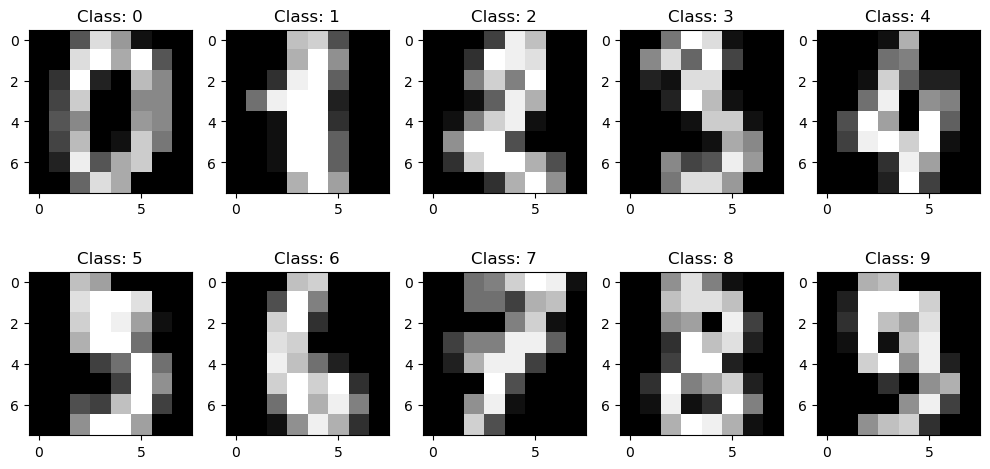

In [35]:
# Your code here.
# Create a 5x5 grid of subplots with a defined figure size
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Plot the 10 classes and their corresponding labels in the dataset
for i in range(10):
    row = i // 5  # Determine the row position (0 to 4)
    col = i % 5   # Determine the column position (0 to 4)

    # Display the image using grayscale colormap
    axes[row, col].imshow(ds_digits.images[i], cmap='gray')

    # Set the title for the subplot with the image label
    axes[row, col].set_title(f"Class: {ds_digits.target[i]}")

# Adjust the spacing between subplots for better layout
plt.tight_layout()

# Display the subplots
plt.show()

### Exercise 3.3: Find the best classifier (of the ones we have seen)

You should now be very familiar with this game and if you consolidated the pieces you used before, this exercise should be easy. As always, document, summarize, and justify your conclusions and analyses.

In [36]:
# Your code here.
Xtr, Xte, ytr, yte = train_test_split(df_digits, targets_digits, test_size=0.75)

bestClassifier(Xtr, ytr)


Best LDA Configuration:
Evaluating Degree 1:
  Degree: 1, Shrinkage: None, Score: 0.9399
  Degree: 1, Shrinkage: auto, Score: 0.9332
  Degree: 1, Shrinkage: 1e-07, Score: 0.9399
  Degree: 1, Shrinkage: 0.2, Score: 0.9376
  Degree: 1, Shrinkage: 0.3, Score: 0.9443
  Degree: 1, Shrinkage: 0.4, Score: 0.9377
  Degree: 1, Shrinkage: 0.9, Score: 0.9132
Evaluating Degree 2:
  Degree: 2, Shrinkage: None, Score: 0.1024
  Degree: 2, Shrinkage: auto, Score: 0.9777
  Degree: 2, Shrinkage: 1e-07, Score: 0.9666
  Degree: 2, Shrinkage: 0.2, Score: 0.9644
  Degree: 2, Shrinkage: 0.3, Score: 0.9666
  Degree: 2, Shrinkage: 0.4, Score: 0.9644
  Degree: 2, Shrinkage: 0.9, Score: 0.9131

Best LDA Configuration:
Best Degree: 2
Best Shrinkage: auto
Best Score: 0.9777

Best QDA Configuration:
Degree 1:
  Reg_param: 0.1, Score: 0.9355
  Reg_param: 0.2, Score: 0.9399
  Reg_param: 0.3, Score: 0.9377
  Reg_param: 0.4, Score: 0.9310
  Reg_param: 0.5, Score: 0.9177
  Reg_param: 0.9, Score: 0.8330

Degree 2:
  Reg